### Курсовой проект для курса "Python для Data Science"

**Подключение библиотек**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

from sklearn.preprocessing import RobustScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

import warnings
warnings.filterwarnings('ignore')

**Пути к файлам**

In [2]:
TEST_DATASET_PATH = 'test.csv'
DATASET_PATH = 'train.csv'

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1**, **Ecology_2**, **Ecology_3** - экологические показатели местности
* **Social_1**, **Social_2**, **Social_3** - социальные показатели местности
* **Healthcare_1**, **Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1**, **Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [3]:
X = pd.read_csv(DATASET_PATH)
test_data = pd.read_csv(TEST_DATASET_PATH)

In [4]:
X

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [5]:
X.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [6]:
test_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [7]:
X.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [8]:
test_data.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

# Обработка и удаление признаков

Строки, в которых есть пропуски и несостыковки по нескольким показателям я решил полностью удалить и никак не обрабатывать.

In [9]:
X = X.drop(X[(X['Floor'] > X['HouseFloor']) & 
       X['LifeSquare'].isnull() & 
       X['Healthcare_1'].isnull()].index, axis=0)

Восстанавливаем данные медианными или средними значениями

In [10]:
def replace_nan_with_mean(X):
    X.loc[X['Healthcare_1'].isnull(), 'Healthcare_1'] = X['Healthcare_1'].mean()
    X.loc[X['LifeSquare'].isnull(), 'LifeSquare'] = X['LifeSquare'].median()
    
replace_nan_with_mean(X)
replace_nan_with_mean(test_data)

**Некоторые некорректные на мой взгляд данные были удалены.**

In [11]:
X = X.drop(X[X['Rooms'] < 1].index, axis=0)
X = X.drop(X[X['Rooms'] > 6].index, axis=0)

test_data.loc[(test_data['Rooms'] > 6) | 
              (test_data['Rooms'] < 1), 'Rooms'] = test_data['Rooms'].mean()

In [12]:
X = X.drop(X[X['Square'] > 300].index, axis=0)
X = X.drop(X[X['Square'] < 15].index, axis=0)

test_data.loc[(test_data['Square'] < 15) , 
              'Square'] = test_data['LifeSquare'] + test_data['KitchenSquare']

test_data.loc[(test_data['Square'] < 15) , 
              'Square'] = test_data['LifeSquare'].describe()['25%']

In [13]:
X.loc[X['LifeSquare'] > X['Square'], 'LifeSquare'] = X['Square']

test_data.loc[test_data['KitchenSquare'] > 15, 
              'KitchenSquare'] = test_data['KitchenSquare'].median()

test_data.loc[test_data['LifeSquare'] > test_data['Square'], 
              'LifeSquare'] = test_data['Square'] - test_data['KitchenSquare']

In [14]:
X = X.drop(X[X['LifeSquare'] < 11].index, axis=0)

test_data.loc[test_data['LifeSquare'] < 11, 
              'LifeSquare'] = test_data['LifeSquare'].median()

test_data.loc[test_data['LifeSquare'] > test_data['Square'], 
              'LifeSquare'] = test_data['Square'] - test_data['KitchenSquare']

In [15]:
X = X.drop(X[(X['KitchenSquare'] > 150)].index, axis=0)

Далее удаляются сомнительные строки, или строки с неоднозначными данными, в которых либо явная ошибка, либо скорее всего ошибка

In [16]:
X = X.drop(X[((X['LifeSquare'] <  15) |
      (X['LifeSquare'] <  X['KitchenSquare'])) & 
      (X['Floor'] > X['HouseFloor'])].index, axis=0)

In [17]:
X = X.drop(X[(X['Rooms'] < 2) & (X['Square'] > 70) & 
             ((X['LifeSquare'] + X['KitchenSquare']) > X['Square'])].index, 
           axis=0)

**Обработка жилой площади и площади кухни**

Сумма площадей не должна превышать общей площади недвижимости

In [18]:
X.loc[X['KitchenSquare'] > (X['Square'] - X['LifeSquare']), 
                          'KitchenSquare'] = X['KitchenSquare'].median()

X.loc[X['KitchenSquare'] > (X['Square'] - X['LifeSquare']), 
                          'LifeSquare'] = X['LifeSquare'].median()

X = X.drop(X[X['KitchenSquare'] > (X['Square'] - X['LifeSquare'])].index, axis=0)

test_data.loc[test_data['KitchenSquare'] > (test_data['Square'] - test_data['LifeSquare']), 
                          'KitchenSquare'] = test_data['KitchenSquare'].median()

test_data.loc[test_data['KitchenSquare'] > (test_data['Square'] - test_data['LifeSquare']), 
                          'KitchenSquare'] = test_data['Square'] - test_data['LifeSquare']

**Обработка этажей**

Этаж квартиры не может превышать высоту дома в этажах

In [19]:
X = X.drop(X[X['HouseFloor'] > 50].index, axis=0)
X.loc[X['Floor'] > X['HouseFloor'], 'Floor'] = X['Floor'].median()
X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor'] = X['HouseFloor'].mean()

test_data.loc[test_data['Floor'] > 50, 'Floor'] = test_data['Floor'].median()

test_data.loc[(test_data['HouseFloor'] > 50) | 
              (test_data['HouseFloor'] < 1), 
              'HouseFloor'] = test_data['HouseFloor'].median()

test_data.loc[test_data['Floor'] > test_data['HouseFloor'], 
              'Floor'] = test_data['Floor'].median()

test_data.loc[test_data['Floor'] > test_data['HouseFloor'], 
              'HouseFloor'] = test_data['HouseFloor'].mean()

**Обрабокта года строительства**

In [20]:
def IQ_method(X, feature):
    IQ = X[feature].describe()['75%'] - X[feature].describe()['25%']
    lower = X[feature].describe()['25%'] - IQ * 1.5
    upper = X[feature].describe()['75%'] + IQ * 1.5
    
    return lower, upper

In [21]:
X = X.drop(X[X['HouseYear'] > 3000].index, axis=0)

lower, upper = IQ_method(X, 'HouseYear')
X = X.drop(X[(X['HouseYear'] < lower) | 
             (X['HouseYear'] > upper)].index, axis=0)

# Добавление новых признаков

**Средняя цена по возрасту дома**

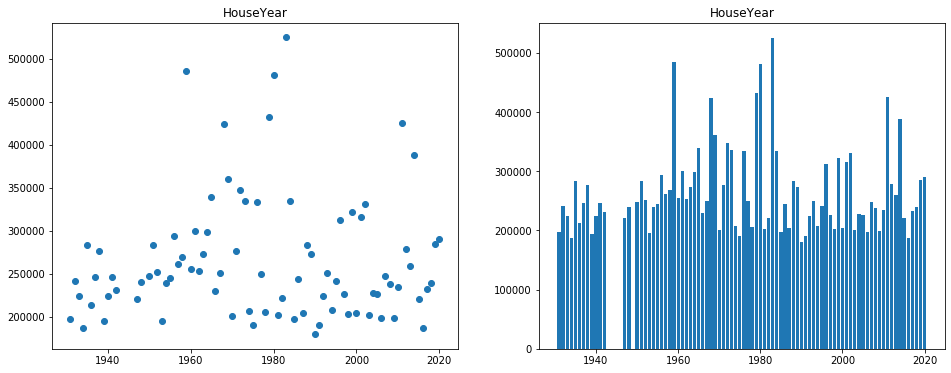

In [22]:
fig, ax = plt.subplots(1, 2)
ax1, ax2 = ax.flatten()

ax1.scatter(X['HouseYear'].unique(), 
            X.groupby('HouseYear')['Price'].mean())
ax1.set_title('HouseYear')

ax2.bar(X['HouseYear'].unique(), X.groupby('HouseYear')['Price'].mean())
ax2.set_title('HouseYear')

fig.set_size_inches(16,6)
plt.show()

In [23]:
# ухудшил модель
'''year_price = pd.Series(X.groupby('HouseYear')['Price'].mean())

X = pd.merge(X, year_price.rename('Year_price'), on='HouseYear')
test_data = pd.merge(test_data, year_price.rename('Year_price'), 
                     on='HouseYear', how='left')

test_data['Year_price'].fillna(test_data['Year_price'].median(), inplace=True)'''

"year_price = pd.Series(X.groupby('HouseYear')['Price'].mean())\n\nX = pd.merge(X, year_price.rename('Year_price'), on='HouseYear')\ntest_data = pd.merge(test_data, year_price.rename('Year_price'), \n                     on='HouseYear', how='left')\n\ntest_data['Year_price'].fillna(test_data['Year_price'].median(), inplace=True)"

**Средняя цена по высоте дома**

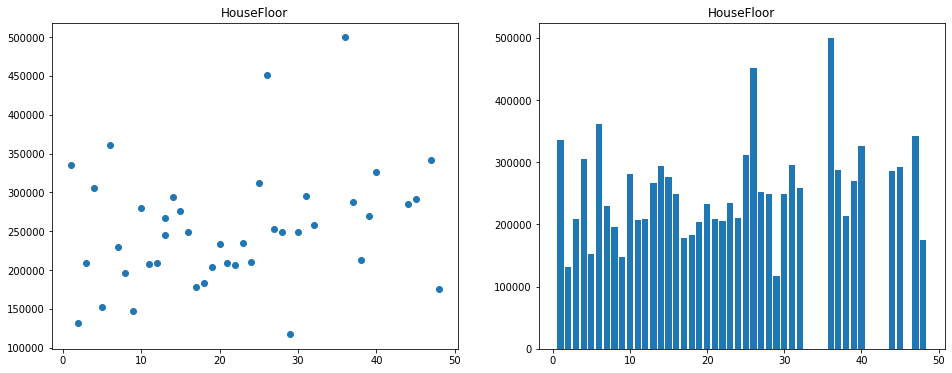

In [24]:
fig, ax = plt.subplots(1, 2)
ax1, ax2 = ax.flatten()

ax1.scatter(X['HouseFloor'].unique(), 
            X.groupby('HouseFloor')['Price'].mean())
ax1.set_title('HouseFloor')

ax2.bar(X['HouseFloor'].unique(), X.groupby('HouseFloor')['Price'].mean())
ax2.set_title('HouseFloor')

fig.set_size_inches(16,6)
plt.show()

In [25]:
# ухудшил модель
'''housef_price = pd.Series(X.groupby('HouseFloor')['Price'].mean())

X = pd.merge(X, housef_price.rename('Housef_price'), on='HouseFloor')
test_data = pd.merge(test_data, housef_price.rename('Housef_price'), 
                     on='HouseFloor', how='left')

test_data['Housef_price'].fillna(test_data['Housef_price'].median(), inplace=True)'''

"housef_price = pd.Series(X.groupby('HouseFloor')['Price'].mean())\n\nX = pd.merge(X, housef_price.rename('Housef_price'), on='HouseFloor')\ntest_data = pd.merge(test_data, housef_price.rename('Housef_price'), \n                     on='HouseFloor', how='left')\n\ntest_data['Housef_price'].fillna(test_data['Housef_price'].median(), inplace=True)"

**Средняя цена по этажу квартиры**

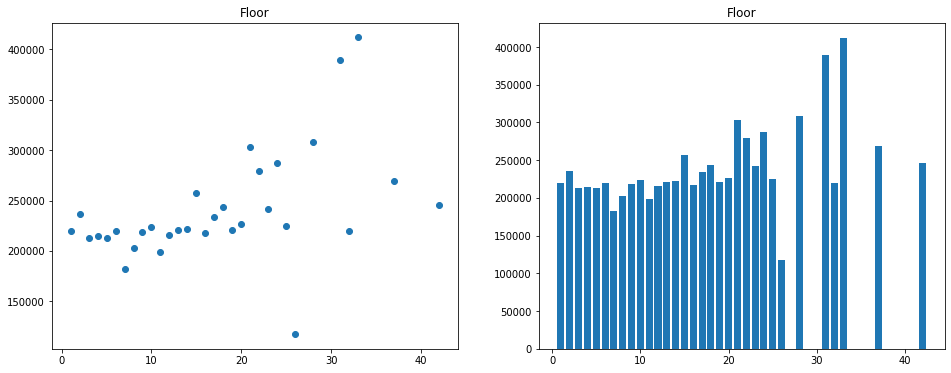

In [26]:
fig, ax = plt.subplots(1, 2)
ax1, ax2 = ax.flatten()

ax1.scatter(X['Floor'].unique(), X.groupby('Floor')['Price'].mean())
ax1.set_title('Floor')

ax2.bar(X['Floor'].unique(), X.groupby('Floor')['Price'].mean())
ax2.set_title('Floor')

fig.set_size_inches(16,6)
plt.show()

In [27]:
floor_price = pd.Series(X.groupby('Floor')['Price'].mean())

X = pd.merge(X, floor_price.rename('Floor_price'), on='Floor')
test_data = pd.merge(test_data, floor_price.rename('Floor_price'), 
                     on='Floor', how='left')

test_data['Floor_price'].fillna(test_data['Floor_price'].median(), inplace=True)

**Средняя цена за квадратный метр по району**

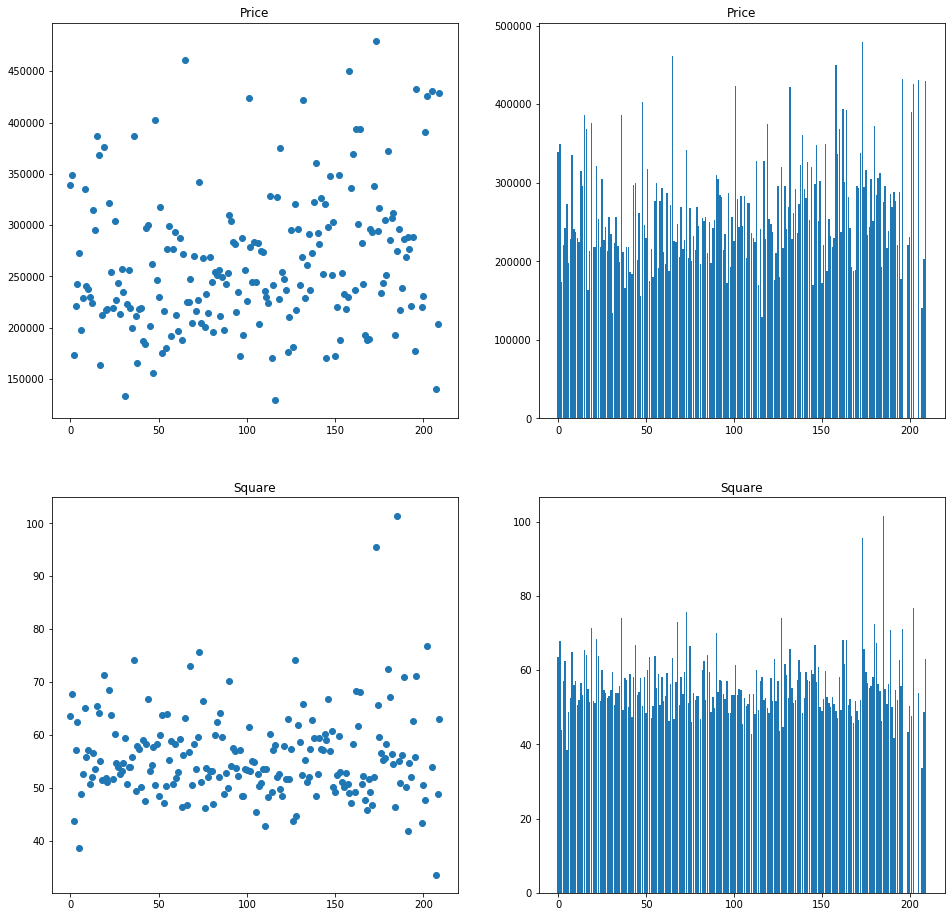

In [28]:
fig, ax = plt.subplots(2, 2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.scatter(X['DistrictId'].unique(), X.groupby('DistrictId')['Price'].mean())
ax1.set_title('Price')

ax2.bar(X['DistrictId'].unique(), X.groupby('DistrictId')['Price'].mean())
ax2.set_title('Price')

ax3.scatter(X['DistrictId'].unique(), X.groupby('DistrictId')['Square'].mean())
ax3.set_title('Square')

ax4.bar(X['DistrictId'].unique(), X.groupby('DistrictId')['Square'].mean())
ax4.set_title('Square')

fig.set_size_inches(16,16)
plt.show()

In [29]:
district_mean_price = X.groupby('DistrictId')['Price'].mean()
district_mean_square = X.groupby('DistrictId')['Square'].mean()
dist_price = pd.Series(district_mean_price / district_mean_square)

X = pd.merge(X, dist_price.rename('Dist_sqr_price'), on='DistrictId')
test_data = pd.merge(test_data, dist_price.rename('Dist_sqr_price'), on='DistrictId',
                    how='left')

test_data['Dist_sqr_price'].fillna(test_data['Dist_sqr_price'].median(), inplace=True)

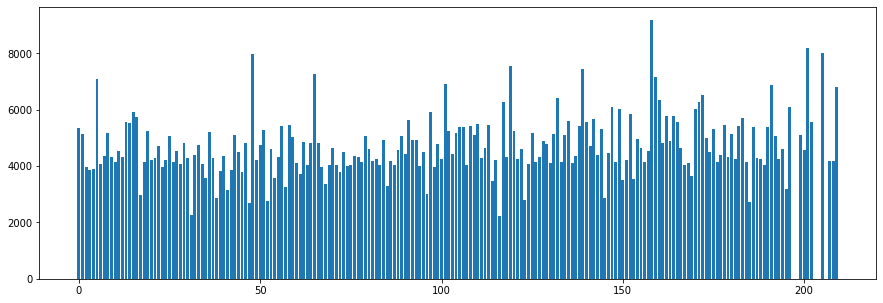

In [30]:
plt.figure(figsize=(15,5))
plt.bar(X['DistrictId'].unique(), dist_price);

**Удалим замененные признаки**

In [31]:
X.drop('DistrictId', axis=1, inplace=True)
X.drop('Floor', axis=1, inplace=True)

test_data.drop('DistrictId', axis=1, inplace=True)
test_data.drop('Floor', axis=1, inplace=True)

**Признак Id не нужно учитывать**

In [32]:
X.drop("Id", axis=1, inplace=True)

test_id = test_data['Id']
test_data.drop("Id", axis=1, inplace=True)

In [33]:
X.reset_index(drop=True, inplace=True)

**Количественные признаки**

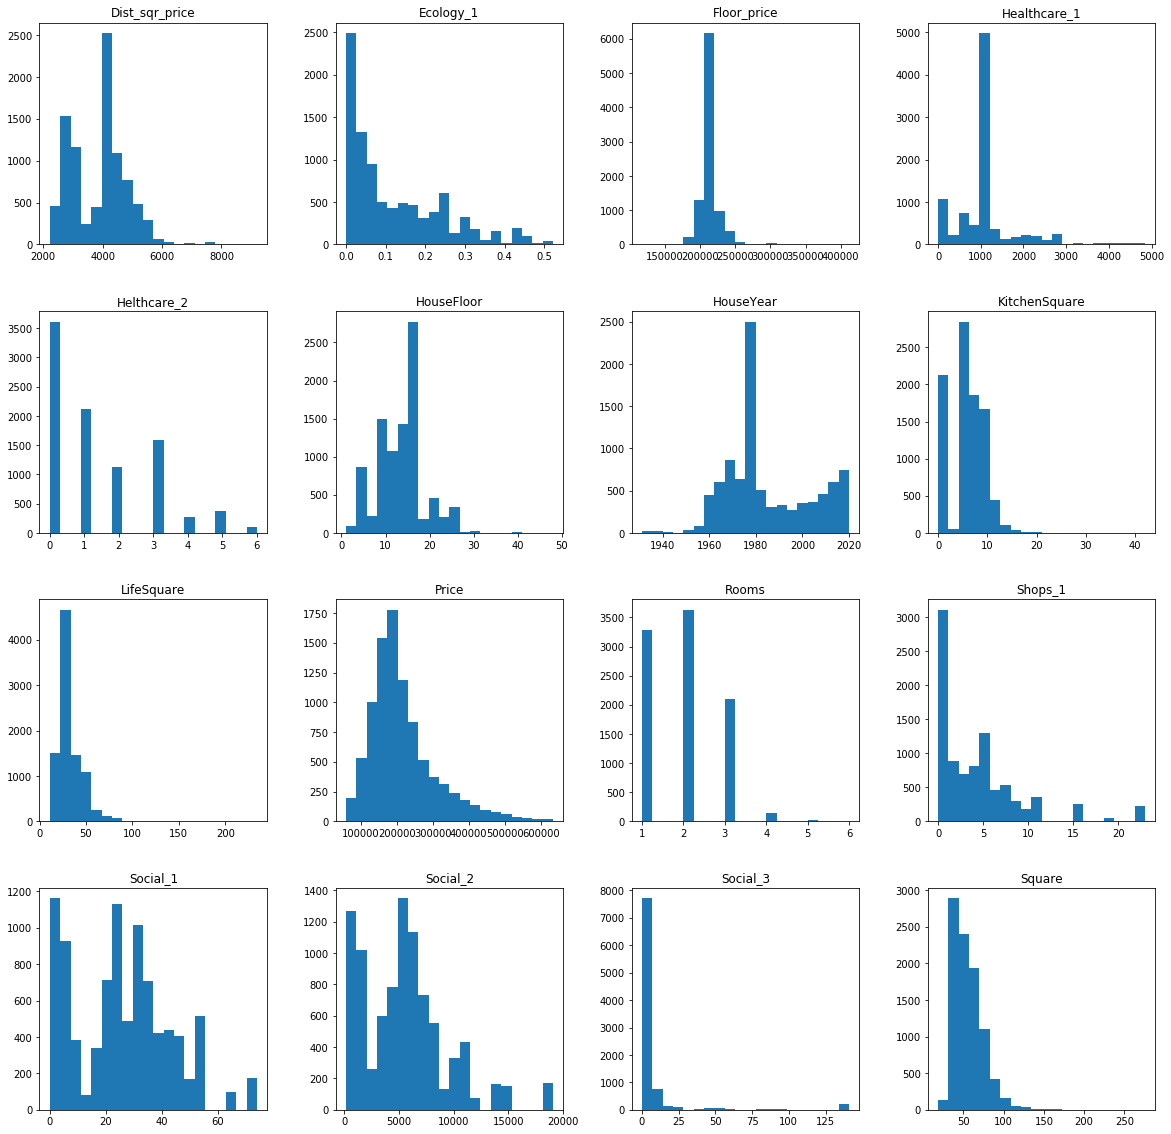

In [34]:
X_num_features = X.select_dtypes(exclude='object')
X_num_features.hist(figsize=(20,20), bins=20, grid=False);

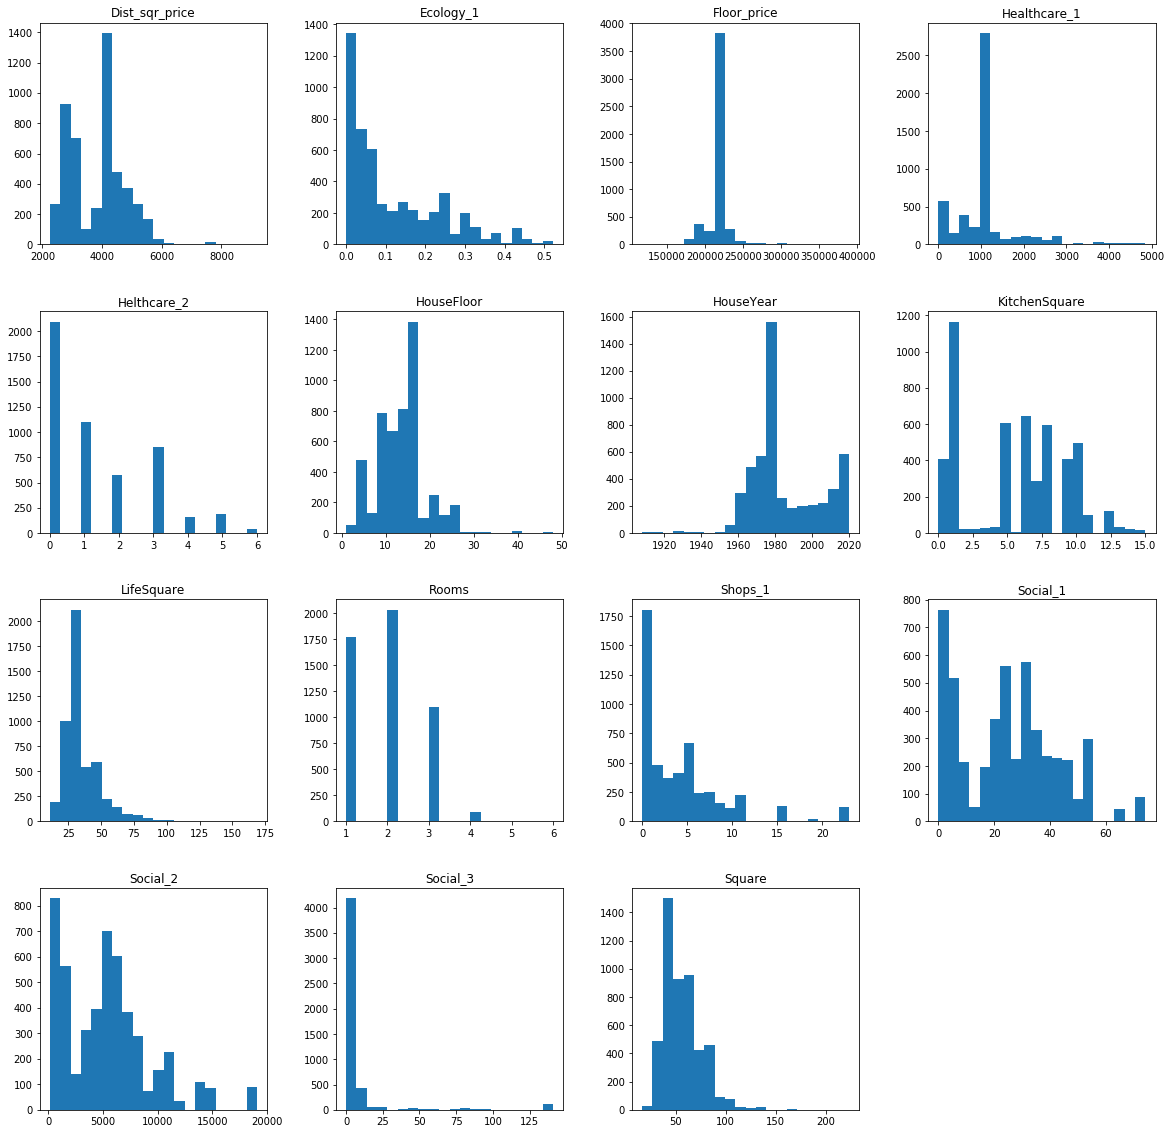

In [35]:
test_num_features = test_data.select_dtypes(exclude='object')
test_num_features.hist(figsize=(20,20), bins=20, grid=False);

**Матрица корреляций**

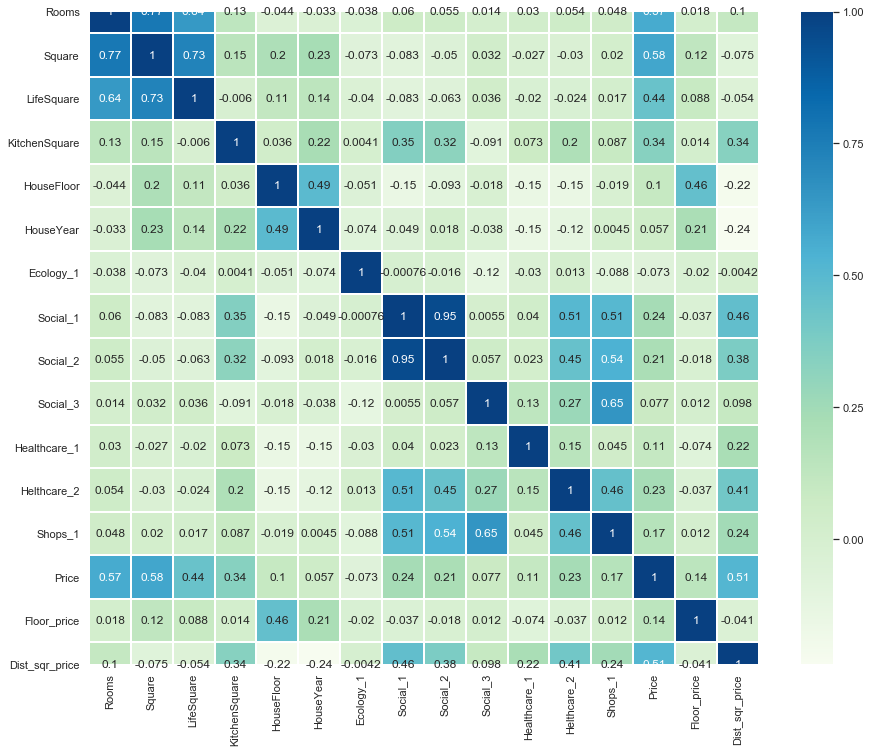

In [36]:
plt.figure(figsize = (15,12))
sns.set(font_scale=1)
sns.heatmap(X.corr(), annot=True, linewidth=1, cmap='GnBu');

In [37]:
y = X['Price']
X = X.drop('Price', axis=1)

# Обработанные данные

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9180 entries, 0 to 9179
Data columns (total 18 columns):
Rooms             9180 non-null float64
Square            9180 non-null float64
LifeSquare        9180 non-null float64
KitchenSquare     9180 non-null float64
HouseFloor        9180 non-null float64
HouseYear         9180 non-null int64
Ecology_1         9180 non-null float64
Ecology_2         9180 non-null object
Ecology_3         9180 non-null object
Social_1          9180 non-null int64
Social_2          9180 non-null int64
Social_3          9180 non-null int64
Healthcare_1      9180 non-null float64
Helthcare_2       9180 non-null int64
Shops_1           9180 non-null int64
Shops_2           9180 non-null object
Floor_price       9180 non-null float64
Dist_sqr_price    9180 non-null float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.3+ MB


In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 18 columns):
Rooms             5000 non-null float64
Square            5000 non-null float64
LifeSquare        5000 non-null float64
KitchenSquare     5000 non-null float64
HouseFloor        5000 non-null float64
HouseYear         5000 non-null int64
Ecology_1         5000 non-null float64
Ecology_2         5000 non-null object
Ecology_3         5000 non-null object
Social_1          5000 non-null int64
Social_2          5000 non-null int64
Social_3          5000 non-null int64
Healthcare_1      5000 non-null float64
Helthcare_2       5000 non-null int64
Shops_1           5000 non-null int64
Shops_2           5000 non-null object
Floor_price       5000 non-null float64
Dist_sqr_price    5000 non-null float64
dtypes: float64(9), int64(6), object(3)
memory usage: 742.2+ KB


In [40]:
X.describe()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Floor_price,Dist_sqr_price
count,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000
mean,1.908279,56.092276,34.114806,6.099129,13.832435,1984.755882,0.121453,25.830065,5578.732898,8.135948,1148.159154,1.379521,4.371678,216710.609280,3886.558619
std,0.812178,18.645370,12.687525,3.634335,5.426602,18.183447,0.121030,17.246389,3960.043323,23.718077,759.293564,1.497638,4.782009,13028.015557,929.027836
min,1.000000,18.509177,11.047605,0.000000,1.000000,1931.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,117647.461002,2219.859577
25%,1.000000,41.879998,25.728613,5.000000,9.000000,1973.000000,0.017647,9.000000,2270.000000,0.000000,770.000000,0.000000,1.000000,213303.486919,3023.371524
50%,2.000000,52.466545,32.781260,6.000000,14.000000,1977.000000,0.075779,25.000000,5487.000000,2.000000,1142.904460,1.000000,3.000000,219011.416607,4052.919766
75%,2.000000,65.719951,37.269196,9.000000,17.000000,2001.000000,0.195781,36.000000,7614.000000,5.000000,1142.904460,3.000000,6.000000,220519.177992,4413.064930
max,6.000000,275.645284,233.949309,42.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,411691.504766,9191.504450


In [41]:
test_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Floor_price,Dist_sqr_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,1.907746,56.498166,35.814601,5.461870,13.746856,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,217253.834593,3845.749565
std,0.810077,18.998651,14.318334,3.712009,5.528071,18.573149,0.120070,17.532202,4026.614773,23.863762,756.632091,1.47994,4.777365,13312.770280,937.783165
min,1.000000,16.319015,11.070513,0.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,117647.461002,2249.545738
25%,1.000000,41.912403,27.750548,1.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,213303.486919,2965.766627
50%,2.000000,52.924953,32.925087,6.000000,12.898000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1146.657263,1.00000,3.000000,219011.416607,4050.683932
75%,2.000000,66.285129,41.194184,8.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1146.657263,2.00000,6.000000,220519.177992,4364.896488
max,6.000000,223.453689,168.729035,15.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,389554.063540,9191.504450


In [42]:
y.describe()

count      9180.000000
mean     216710.609280
std       92420.444576
min       59174.778028
25%      156741.220651
50%      194190.255401
75%      251370.942870
max      633233.466570
Name: Price, dtype: float64

# Стандартизация признаков

In [43]:
X = pd.get_dummies(X)
test_data = pd.get_dummies(test_data)

In [44]:
cols_for_scaling = ['Rooms', 'Square', 'LifeSquare', 
                    'KitchenSquare', 'HouseFloor', 'HouseYear',
                    'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
                    'Healthcare_1', 'Helthcare_2', 'Shops_1', 
                    'Floor_price', 'Dist_sqr_price']

scaler = RobustScaler()

scaled_features = scaler.fit_transform(X[cols_for_scaling])
X[cols_for_scaling] = pd.DataFrame(scaled_features, columns=cols_for_scaling)

scaled_test = scaler.transform(test_data[cols_for_scaling])
test_data[cols_for_scaling] = pd.DataFrame(scaled_test, columns=cols_for_scaling)

In [45]:
X.describe()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,...,Helthcare_2,Shops_1,Floor_price,Dist_sqr_price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,...,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.00000,9180.00000
mean,-0.091721,0.152086,0.115553,0.024782,-0.020946,0.276996,0.256404,0.030743,0.017166,1.227190,...,0.126507,0.274336,-0.318862,-0.119711,0.010566,0.989434,0.029521,0.970479,0.06939,0.93061
std,0.812178,0.782106,1.099383,0.908584,0.678325,0.649409,0.679431,0.638755,0.741026,4.743615,...,0.499213,0.956402,1.805512,0.668513,0.102254,0.102254,0.169270,0.169270,0.25413,0.25413
min,-1.000000,-1.424389,-1.883237,-1.500000,-1.625000,-1.642857,-0.425403,-0.925926,-0.995322,-0.400000,...,-0.333333,-0.600000,-14.047713,-1.319039,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,-1.000000,-0.444067,-0.611117,-0.250000,-0.625000,-0.142857,-0.326337,-0.592593,-0.601984,-0.400000,...,-0.333333,-0.400000,-0.791044,-0.740846,0.000000,1.000000,0.000000,1.000000,0.00000,1.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.00000
75%,0.000000,0.555933,0.388883,0.750000,0.375000,0.857143,0.673663,0.407407,0.398016,0.600000,...,0.666667,0.600000,0.208956,0.259154,0.000000,1.000000,0.000000,1.000000,0.00000,1.00000
max,4.000000,9.361543,17.431359,9.000000,4.250000,1.535714,2.504229,1.814815,2.544162,27.800000,...,1.666667,4.000000,26.702929,3.697639,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [46]:
test_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,...,Helthcare_2,Shops_1,Floor_price,Dist_sqr_price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.092254,0.169112,0.262841,-0.134532,-0.031643,0.264021,0.247539,-0.002452,-0.014989,1.252520,...,0.106467,0.248560,-0.243578,-0.149076,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600
std,0.810077,0.796925,1.240694,0.928002,0.691009,0.663327,0.674042,0.649341,0.753483,4.772752,...,0.493313,0.955473,1.844975,0.674813,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001
min,-1.000000,-1.516258,-1.881252,-1.500000,-1.625000,-2.464286,-0.425403,-0.925926,-0.995322,-0.400000,...,-0.333333,-0.600000,-14.047713,-1.297678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,-0.442708,-0.435915,-1.250000,-0.625000,-0.142857,-0.315886,-0.703704,-0.734094,-0.400000,...,-0.333333,-0.400000,-0.791044,-0.782297,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,0.019229,0.012463,0.000000,-0.137750,0.000000,-0.020328,0.000000,-0.037799,0.000000,...,0.000000,0.000000,0.000000,-0.001609,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,0.579640,0.728986,0.500000,0.375000,0.821429,0.673663,0.407407,0.336826,0.600000,...,0.333333,0.600000,0.208956,0.224493,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,4.000000,7.172294,11.779975,2.250000,4.250000,1.535714,2.504229,1.814815,2.544162,27.800000,...,1.666667,4.000000,23.634971,3.697639,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Построение модели

In [47]:
parameters = {
    'n_estimators': [910, 915, 920], 
    'max_depth': [39, 40, 41],
    'max_features': [5, 6, 7]
}

In [48]:
'''
rfr = RandomForestRegressor(random_state=42)

gs = GridSearchCV(rfr, parameters, scoring='r2', n_jobs=-1, 
                  cv=KFold(n_splits=4, random_state=42, shuffle=True))
gs.fit(X, y)
'''

rfr = RandomForestRegressor(n_estimators=7504, 
                            max_features=6,
                            max_depth=40,
                            random_state=42)

In [49]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True,
                                                      test_size=0.25,
                                                      random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_valid)

In [50]:
'''y_pred_test = pd.DataFrame({'Id': test_id, 
                           'Price': rfr.predict(test_data)}, 
                           columns=['Id', 'Price'])
y_pred_test.to_csv('Test_predictions_new_features.csv', index=False)'''

"y_pred_test = pd.DataFrame({'Id': test_id, \n                           'Price': rfr.predict(test_data)}, \n                           columns=['Id', 'Price'])\ny_pred_test.to_csv('Test_predictions_new_features.csv', index=False)"

In [51]:
r2(y_valid, y_pred)

0.7793183339803903

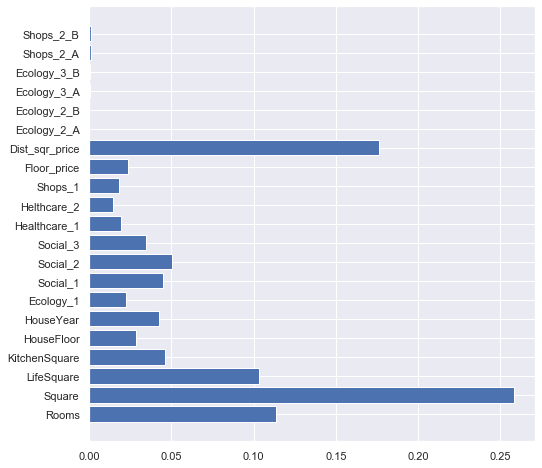

In [52]:
plt.figure(figsize=(8,8))
plt.barh(X.columns, rfr.feature_importances_);